CSc 599.69 Visualization, Spring 2017, Homework 2
=======================================================


Let me be very clear. Regardless of how little time or what happened in your life, your solutions should
not contain code or text that were copied from other students (this year or prior years). Doing so
is a violation of the academic honor code. Please


Exercise 1: Advanced matplotlib: Publication-ready plots
----------------------------------------------------------------------------------
The goal of this exercise is to get accustomed to object-oriented interface to matplotlib and go through entire process of figure preparation - from design to the final figure ready for submission. Exercise taken from https://github.com/btel/visualization-talk updated by Hannah Aizenman and Michael Grossberg

* Given the code below:
    * Read comments and identify basic matplotlib artists (like lines, axes, etc.)
    * Try to understand how ``spines`` in matplotlib work and how they provide framing and at the same time show data range and hide the default top ticks.

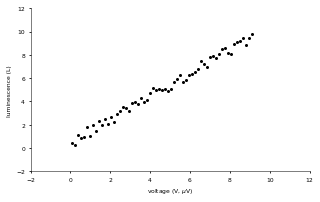

In [1]:
%matplotlib inline
import numpy as np
import matplotlib


import matplotlib.pyplot as plt
import matplotlib as mpl

# generate some random data
t = np.arange(0.1, 9.2, 0.15)
y = t+np.random.rand(len(t))

#first create the figure
fig = plt.figure(figsize=(5,3))

#create a grid of 1 row and 1 column for the plot
#[left, bottom, width, height]
gs = mpl.gridspec.GridSpec(1,1)
#put a plot in the first row, first column
ax = fig.add_subplot(gs[0])

#Have only two spines visible and set properties
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.xaxis.set_ticks_position('bottom')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.yaxis.set_ticks_position('left')

#set tick properties
ax.xaxis.set_tick_params('major', length=2, labelsize=6)
ax.yaxis.set_tick_params('major', length=2, labelsize=6)

#plot data and customize look of plot
ax.plot(t,y, marker='.', color='k', linestyle='',
        markersize=4, clip_on=False)

#set axis limits 
ax.set_xlim((-2,12))
ax.set_ylim((-2,12))

#scale the view to show all datapoints
ax.autoscale_view()

#set labels
ax.set_xlabel(r'voltage (V, $\mu$V)', fontsize=6, family='sans-serif')
ax.set_ylabel('luminescence (L)', fontsize=6, family='sans-serif')

fig.savefig('mpl_template.svg')

These data have 0 rows and 8 columns, describing 5 morphological measurements on 50 crabs each of two colour forms and both sexes, of the species Leptograpsus variegatus collected at Fremantle, W. Australia (From Venables & Ripley,Modern Applied Statistics with S, Springer, 2002).

The file contain following columns:
    * ``sp`` species - B (blue) or O (orange)
    * ``sex`` you may guess
    * ``index`` 1:50 for each group (blue male, blue female, etc.)
    * ``FL`` frontal lobe size (mm)
    * ``RW`` rear width (mm). 
    * ``CL`` carapace length (mm).
    * ``CW`` carapace width (mm).
    * ``BD`` body depth (mm).

Recommend way of doing it is with ``numpy.recfromcsv`` function (returns a numpy record array introduced during the numpy lecture), but other alternatives are allowed (such as ``csv`` module, pandas, or standard IO).
   
3. Modify the plot template to plot two of the above measurements against each other. Do not forget to update labels!

4. Add a third dimension to the plot using different methods (choose two):

    * plot two different dependent (y) variable against the same independent (x) variable using different markers. Use double y-axes to show the data dimensions (you may define a new Axes object of type ``matplotlib.axes.Axes.twinx``).

    * represent the third variable with the circles of different sizes (Hint: use ``markersize`` keyword argument of ``plot``)

    * represent the third variable on a color scale, add a color bar to the plot
    * represent the data as a short line segments, where the position of line on XY plane encodes two of the variables and the angle of the segment encodes the third one. 
    
    Which of the data representation is the most accurate?

5. Group variables belonging to the same crab group (blue male, blue female, etc., choose one method):
    * by connecting the points with a line
    * by use of color (make sure not to use colors both for representing groups and representing one of dependent variables)

6. Repeat exercise 4 and 5, but represent different dependent variables/groups in different (non-overlapping) axes.
    Does use of multiple panels increase readability?

7. Preparing publication-quality figure file. Let us assume that you want to prepare the final figure for submission by combining panels each of which contains one of the figures presented above. Although it is possible (and straigthforward) to do that by creating independent axes in the figure, often such approach pose several problems (for example, if the panel itself contains several axes, we would have to shift all of them to new positions). Therefore, here we will do that as a post processing step:
   
   * choose two of above figures and export them to SVG file.

   * modify the ``combine_svg.py`` example to read in the figures and
     move them to their final positions.

   * use inkscape from command line to export the generated SVG file
     to a format of choice, such as PDF::
     
         inkscape final_figure1.svg --export-pdf=final_figure1.pdf

   * (Optional) You may easily automate the entire process using a
     simple ``Makefile`` similar to this one:

         mpl_figure1.svg : mpl_figure1.py
             python mpl_figure1.py mpl_figure1.svg

         mpl_figure2.svg : mpl_figure2.py
             python mpl_figure2.py mpl_figure2.svg

         final_figure1.svg : final_figure1.py mpl_figure1.svg mpl_figure2.svg
             python combine_svg.py
         
         %.pdf : %.svg
             inkscape $< --export-pdf=$@
      
8. "Test drive" your figure. Use the "Visualization Checklist" from https://github.com/btel/visualization-talk/blob/master/Lecture/checklist/checklist.rst What could be improved?

mappingproxy({'bd': (dtype('float64'), 42),
              'cl': (dtype('float64'), 26),
              'cw': (dtype('float64'), 34),
              'f0': (dtype('int32'), 0),
              'fl': (dtype('float64'), 10),
              'index': (dtype('int32'), 6),
              'rw': (dtype('float64'), 18),
              'sex': (dtype('S1'), 5),
              'sp': (dtype('S1'), 4)})

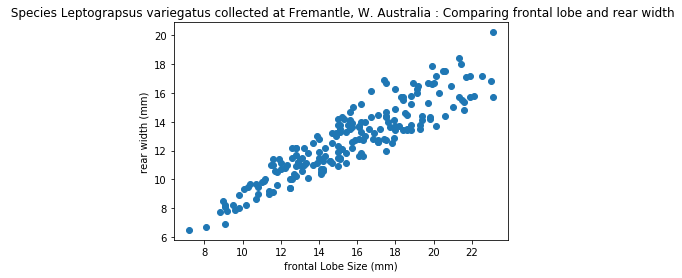

In [2]:
# Part/Problem 1
data = np.recfromcsv('crabs.csv')
plt.scatter(data.fl, data.rw)
plt.xlabel('frontal Lobe Size (mm)')
plt.ylabel('rear width (mm)')
plt.title(' Species Leptograpsus variegatus collected at Fremantle, W. Australia : Comparing frontal lobe and rear width')
data.dtype.fields

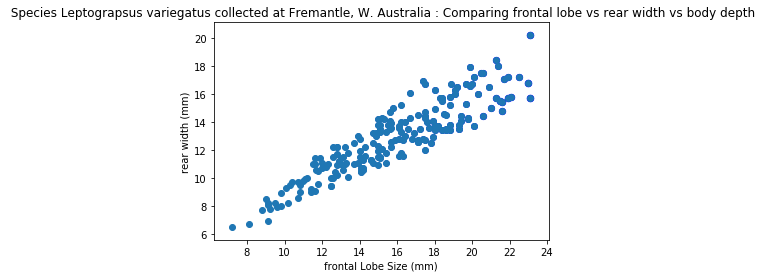

In [3]:
# Part 2/ Problem 2
for x in range(0, len(data.bd)):
    plt.scatter(data.fl[x], data.rw[x], s = data.bd[x]*2, c = 'blue')
plt.scatter(data.fl, data.rw)
plt.xlabel('frontal Lobe Size (mm)')
plt.ylabel('rear width (mm)')
plt.title(' Species Leptograpsus variegatus collected at Fremantle, W. Australia : Comparing frontal lobe vs rear width vs body depth')
plt.show()

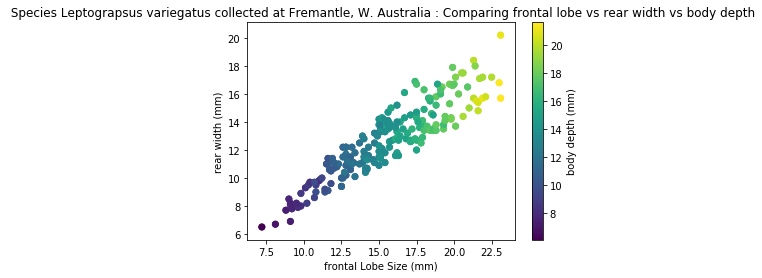

In [5]:
plt.scatter(data.fl, data.rw, c= data.bd)
plt.xlabel('frontal Lobe Size (mm)')
plt.ylabel('rear width (mm)')
plt.title(' Species Leptograpsus variegatus collected at Fremantle, W. Australia : Comparing frontal lobe vs rear width vs body depth')

colormap = plt.cm.get_cmap()
plot = plt.scatter(data.fl, data.rw, c = data.bd, cmap = colormap)
cbar = plt.colorbar(plot)
cbar.ax.set_ylabel('body depth (mm)')

In [19]:
# Problem 3 / Part 3